In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
from os.path import isfile
from IPython.display import display

# Zadawanie wielokąta przy pomocy myszki

<h2>Funkcje do obsługi wielokątów</h2>

In [2]:
# Save polygon to file
# each line contains a point - two floats seperated with a space representing x and y coordinates in that order
def savePolygonToFile(polygon, path):
    file = open(path, "w")
    for point in polygon:
        file.write(f"{point[0]} {point[1]}\n")
    file.close()

# Read polygon from file
def readPolygonFromFile(path):
    if not isfile(path):
        print(f"File {path} not found")
        return None
    file = open(path, "r")
    polygon = []
    for line in file:
        point = [float(x) for x in line.split()]
        polygon.append(tuple(point))
    return polygon

# Generate polygon with a mouse
# makes use of the "%matplotlib ipympl" magic
def generatePolygon():
    # Setup plot
    polygon = []
    plt.close("all")
    fig, ax = plt.subplots()
    ax.set_title("LMB - dodaj punkt, RMB - zakończ")
    connectionId = None

    # Add point to canvas
    def addPoint(point):
        ax.scatter(point[0], point[1], color="blue")

    # Add edge to canvas
    def addEdge(point1, point2):
        xs = [point1[0], point2[0]]
        ys = [point1[1], point2[1]]
        ax.plot(xs, ys, color="blue")
    
    # Mouse click event handler
    def onClick(event):
        # LMB - add point
        if event.button == 1 and event.inaxes == ax:
            point = (event.xdata, event.ydata)
            # Add new point and new edge to the canvas
            addPoint(point)
            if len(polygon) >= 1:
                addEdge(polygon[-1], point)
            # Append new point to the polygon and draw it on canvas
            polygon.append(point)
            plt.draw()
        # RMB - end polygon creation
        elif event.button == 3 and len(polygon) >= 3:
            # Add edge between first and last point
            addEdge(polygon[0], polygon[-1])
            plt.draw()
            ax.set_title("Stworzono wielokąt")
            # Sever the connection
            fig.canvas.mpl_disconnect(connectionId)

    # Connect plot to the event handler
    connectionId = fig.canvas.mpl_connect('button_press_event', onClick)
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    plt.show()
    return polygon

# Draw polygon
def drawPolygon(polygon):
    canvas = Visualizer()
    canvas.add_polygon(polygon, fill=False)
    canvas.add_point(polygon)
    canvas.show()

# Convert point to string
def pointToString(point, decimalPlaces=3):
    stringFormat = f"{{:.{decimalPlaces}f}}"
    return f"({stringFormat.format(point[0])},{stringFormat.format(point[1])})"

# Convert points array to a string of points
def pointsToString(points, decimalPlaces=3):
    result = ""
    for point in points:
        result += f"{pointToString(point, decimalPlaces)}, "
    return result[:-2]

# Print polygon
def printPolygon(polygon):
    print(f"Wielokąt - {len(polygon)} wierzchołków")
    print(pointsToString(polygon))

<h2>Generacja własnego wielokąta oraz jego wizualizacja i zapis do pliku</h2>

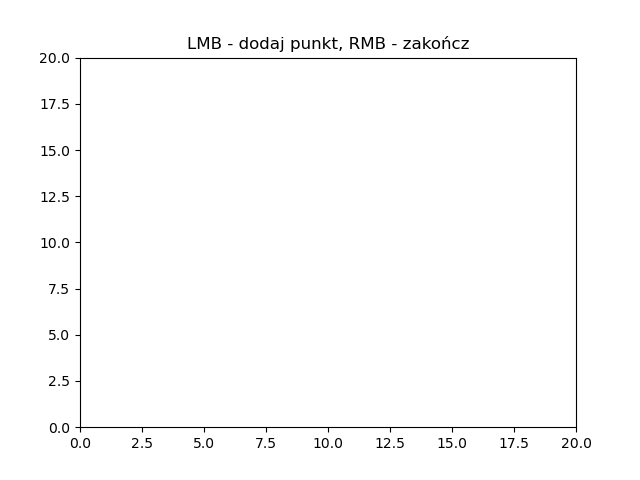

In [3]:
%matplotlib ipympl
generatedPolygon = generatePolygon()

Wielokąt - 16 wierzchołków
(9.879,2.909), (17.621,11.297), (18.266,13.136), (17.823,15.193), (16.815,16.762), (15.927,17.249), (13.629,17.141), (12.056,15.030), (10.685,12.758), (9.435,15.193), (8.347,16.708), (6.573,17.790), (5.121,18.007), (4.153,16.491), (3.629,13.894), (3.992,11.188)


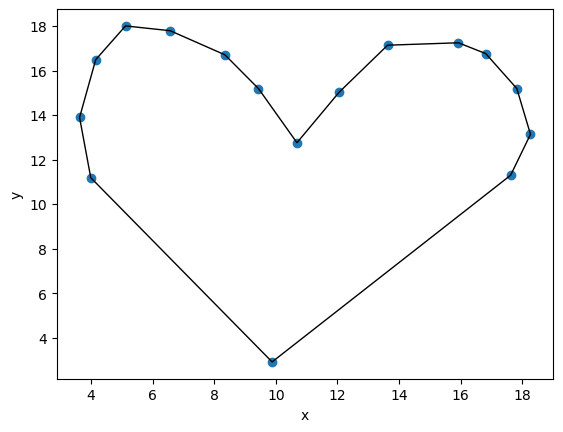

In [4]:
%matplotlib inline
savePolygonToFile(generatedPolygon, "generatedPolygon")
printPolygon(generatedPolygon)
drawPolygon(generatedPolygon)

<h2>Przykładowe wielokąty do testów</h2>

1) Wielokąt z punktami skupionymi na jednym łańcuchu

Wielokąt - 7 wierzchołków
(17.500,17.345), (15.484,14.801), (12.500,12.853), (9.113,11.555), (5.081,10.581), (1.573,10.364), (16.815,1.219)


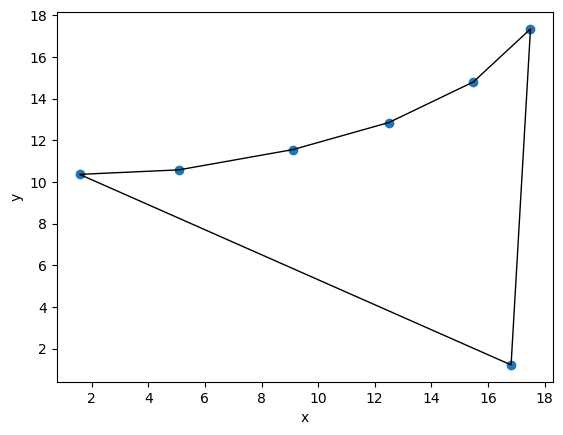

In [28]:
%matplotlib inline
polygon1 = readPolygonFromFile("polygons/polygon1")
printPolygon(polygon1)
drawPolygon(polygon1)

2) Wielokąt testujący odrzucanie przekątnych wychodzących poza wielokąt

Wielokąt - 9 wierzchołków
(2.218,1.544), (18.105,4.033), (7.702,5.440), (17.419,8.091), (7.984,9.498), (16.935,11.284), (8.508,13.232), (17.298,14.910), (6.048,18.048)


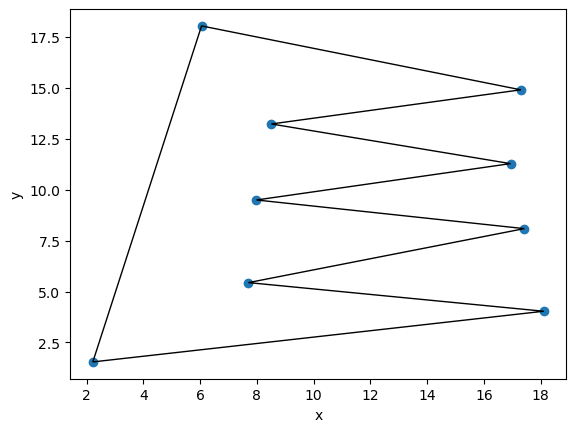

In [6]:
%matplotlib inline
polygon2 = readPolygonFromFile("polygons/polygon2")
printPolygon(polygon2)
drawPolygon(polygon2)

3) Wielokąt "skaczący" pomiędzy łańcuchami

Wielokąt - 19 wierzchołków
(7.944,3.546), (7.944,1.868), (9.476,1.814), (9.435,3.438), (13.226,3.546), (10.000,6.306), (13.508,7.388), (9.879,9.011), (13.871,10.959), (10.847,12.799), (14.395,14.747), (9.718,18.319), (4.194,15.126), (7.581,13.232), (5.081,11.663), (6.895,9.985), (4.234,6.739), (7.298,6.252), (4.315,4.574)


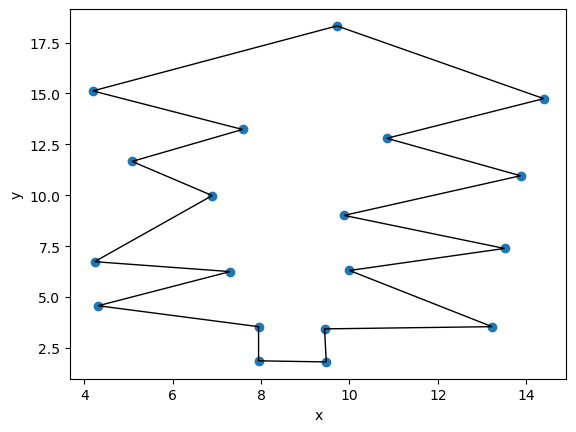

In [7]:
%matplotlib inline
polygon3 = readPolygonFromFile("polygons/polygon3")
printPolygon(polygon3)
drawPolygon(polygon3)

4) Wielokąt nie y-monotoniczny do testu klasyfikacji punktów

Wielokąt - 24 wierzchołków
(9.395,13.665), (7.944,19.239), (5.968,15.451), (2.460,18.156), (1.935,12.420), (3.710,14.910), (7.339,12.637), (4.194,9.390), (3.387,3.329), (7.581,8.578), (8.105,3.925), (5.685,2.626), (8.952,1.436), (9.637,7.388), (13.508,6.143), (15.847,1.436), (18.508,3.438), (15.484,11.446), (12.097,9.769), (12.621,14.693), (16.331,14.477), (15.645,18.860), (11.653,19.184), (11.129,15.721)


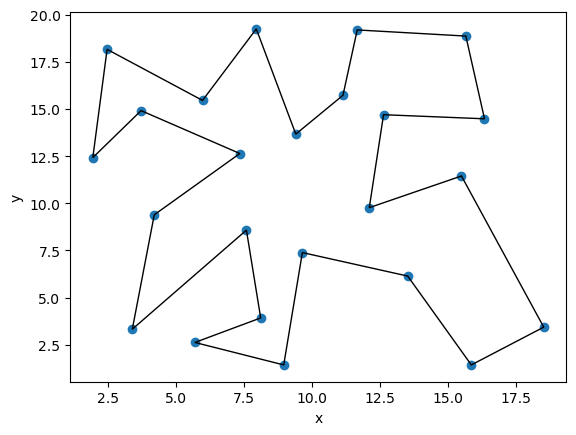

In [8]:
%matplotlib inline
polygon4 = readPolygonFromFile("polygons/polygon4")
printPolygon(polygon4)
drawPolygon(polygon4)

# Sprawdzanie y-monotoniczności wielokąta

<h2>Funkcje do sprawdzania y-monotoniczności</h2>

In [9]:
# Chain classification constants
LEFT = 1
RIGHT = -1

# Point class
class Point:
    def __init__(self, x, y, index, chain):
        self.x = x
        self.y = y
        self.index = index
        self.chain = chain

    def point(self):
        return (self.x, self.y)

# Finds the index of the highest and lowest point
def findLowestAndHighestPoints(polygon):
    yMin = yMax = polygon[0][1]
    indexMin = indexMax = 0
    for i, point in enumerate(polygon):
        y = point[1]
        if y < yMin:
            yMin = y
            indexMin = i
        elif y > yMax:
            yMax = y
            indexMax = i
    return indexMin, indexMax

# Seperates the polygon into left and right side - create chains for both side in order from the highest point to the lowest one
# left side contains the highest point of the polygon, right side conrains the lowest point of the polygon
def seperatePolygon(polygon):
    n = len(polygon)
    indexMin, indexMax = findLowestAndHighestPoints(polygon)
    # Find the length of each chain
    leftAmount = rightAmount = 0
    if indexMin < indexMax:
        leftAmount = indexMin + n - indexMax
        rightAmount = indexMax - indexMin
    else:
        leftAmount = indexMin - indexMax
        rightAmount = indexMax + n - indexMin

    # Create both chains
    leftChain = []
    rightChain = []
    for i in range(indexMax, indexMax+leftAmount):
        point = polygon[i%n]
        leftChain.append(Point(point[0], point[1], i%n, LEFT))
    for i in range(indexMin+rightAmount-1, indexMin-1, -1):
        point = polygon[i%n]
        rightChain.append(Point(point[0], point[1], i%n, RIGHT))

    return leftChain, rightChain

# Check if the polygon is y-monotonic
def yMonotonic(polygon):
    leftChain, rightChain = seperatePolygon(polygon)
    for i in range(len(leftChain)-1):
        if leftChain[i].y < leftChain[i+1].y:
            return False
    for i in range(len(rightChain)-1):
        if rightChain[i].y < rightChain[i+1].y:
            return False
    return True

<h2>Sprawdzenie czy podane wielokąty są y-monotoniczne</h2>

Wielokąt wygenerowany

In [10]:
print(yMonotonic(generatedPolygon))

False


Wielokąt testowy 1

In [11]:
print(yMonotonic(polygon1))

True


Wielokąt testowy 2

In [12]:
print(yMonotonic(polygon2))

True


Wielokąt testowy 3

In [13]:
print(yMonotonic(polygon3))

True


Wielokąt testowy 4

In [14]:
print(yMonotonic(polygon4))

False


# Podział wierzchołków w zależności od ich typu

Podzielimy wierzchołki w zależności od ich typu:
<ul>
    <li style="color:green">początkowy<span style="color:black"> - wierzchołek, którego obaj sąsiedzi leżą poniżej i jego kąt wewnętrzny < $\pi$</span></li>
    <li style="color:red">końcowy<span style="color:black"> - wierzchołek, którego obaj sąsiedzi leżą powyżej i jego kąt wewnętrzny < $\pi$</span></li>
    <li style="color:blue">łączący<span style="color:black"> - wierzchołek, którego obaj sąsiedzi leżą powyżej i jego kąt wewnętrzny > $\pi$</span></li>
    <li style="color:turquoise">dzielący<span style="color:black"> - wierzchołek, którego obaj sąsiedzi leżą poniżej i jego kąt wewnętrzny > $\pi$</span></li>
    <li>prawidłowy - wierzchołek nie spełniający żadnego z powyższych warunków (jeden sąsiad poniżej, jeden powyżej)</li>
</ul>

<h2>Funkcje do kategoryzowania wierzchołków wielokąta</h2>

In [15]:
# Types and colors of vertices
START = 0
END = 1
CONNECT = 2
DIVIDE = 3
CORRECT = 4
vertexTypeColors = ["green", "red", "blue", "turquoise", "black"]

# Determinant of a 2x2 matrix
def det(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])

# Determine the type of a vertex
def categorizeVertex(prevPoint, currPoint, nextPoint):
    minPoint = min(prevPoint, nextPoint, currPoint, key=lambda point: point[1])
    maxPoint = max(prevPoint, nextPoint, currPoint, key=lambda point: point[1])
    if currPoint == maxPoint:
        if det(prevPoint, currPoint, nextPoint) > 0:
            return START
        else:
            return DIVIDE
    elif currPoint == minPoint:
        if det(prevPoint, currPoint, nextPoint) > 0:
            return END
        else:
            return CONNECT
    return CORRECT

# Determine the type of all vertices from a polygon
# returns an array of types of vertices
def categorizePolygonVertices(polygon):
    n = len(polygon)
    vertexTypes = []
    currPoint = polygon[-1]
    nextPoint = polygon[0]
    for i in range(1, n+1):
        prevPoint = currPoint
        currPoint = nextPoint
        nextPoint = polygon[i%n]
        vertexTypes.append(categorizeVertex(prevPoint, currPoint, nextPoint))
    return vertexTypes

# Draw a polygon with vertices colored depending on their type
def drawColoredPolygon(polygon, types):
    pointsByType = [[] for _ in range(5)]
    for i, point in enumerate(polygon):
        pointsByType[types[i]].append(point)
    canvas = Visualizer()
    canvas.add_polygon(polygon, fill=False)
    for i in range(5):
        canvas.add_point(pointsByType[i], color=vertexTypeColors[i])
    canvas.show()

<h2>Podział punktów danych wielokątów</h2>

Wielokąt wygenerowany

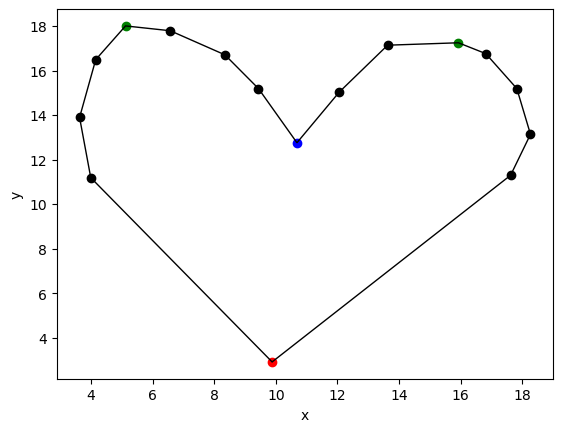

In [16]:
%matplotlib inline
drawColoredPolygon(generatedPolygon, categorizePolygonVertices(generatedPolygon))

Wielokąt testowy 1

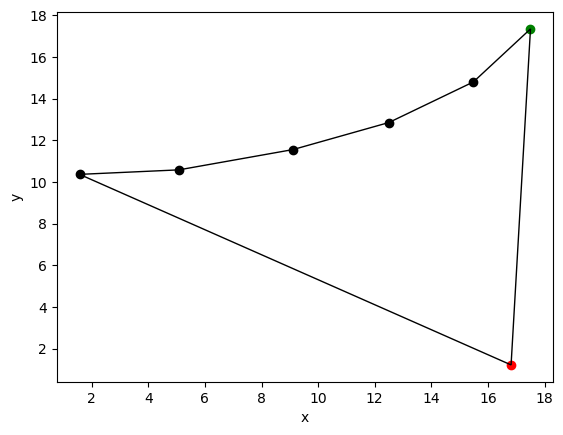

In [17]:
%matplotlib inline
drawColoredPolygon(polygon1, categorizePolygonVertices(polygon1))

Wielokąt testowy 2

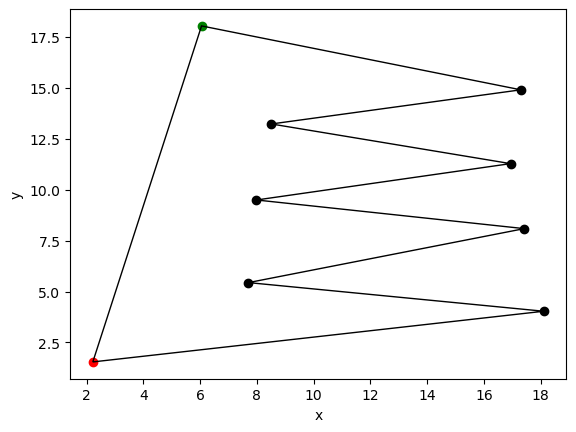

In [18]:
%matplotlib inline
drawColoredPolygon(polygon2, categorizePolygonVertices(polygon2))

Wielokąt testowy 3

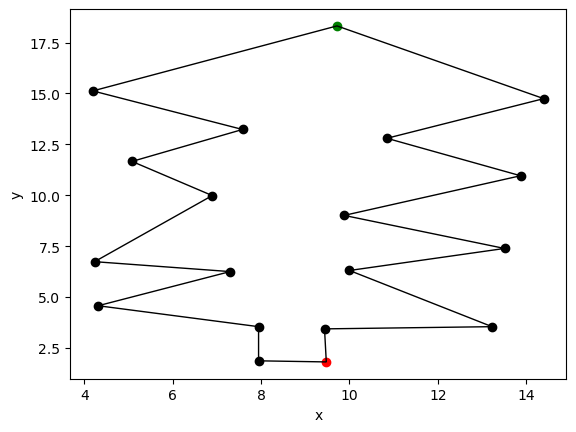

In [19]:
%matplotlib inline
drawColoredPolygon(polygon3, categorizePolygonVertices(polygon3))

Wielokąt testowy 4

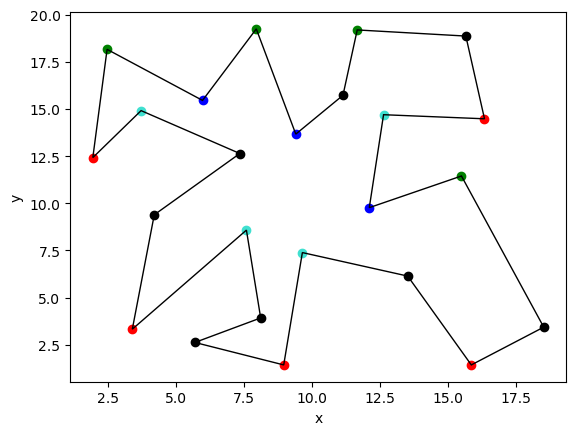

In [20]:
%matplotlib inline
drawColoredPolygon(polygon4, categorizePolygonVertices(polygon4))

# Triangulacja wielokąta monotonicznego

<h2>Funkcje do triangulacji wielokąta monotonicznego</h2>

In [55]:
# Get monotonic order of points of a polygon alongside information regarding which chain do points belong to
def getMonotonicOrder(polygon):
    monotonicOrder = []
    leftChain, rightChain = seperatePolygon(polygon)
    leftAmount = len(leftChain)
    rightAmount = len(rightChain)
    leftIndex = rightIndex = 0
    # Add points until reaching end of either chain
    while leftIndex < leftAmount and rightIndex < rightAmount:
        leftPoint = leftChain[leftIndex]
        rightPoint = rightChain[rightIndex]
        if leftPoint.y > rightPoint.y:
            monotonicOrder.append(leftPoint)
            leftIndex += 1
        else:
            monotonicOrder.append(rightPoint)
            rightIndex += 1
    # Add remaining points from the chain that did not reach it's end
    if leftIndex < leftAmount:
        monotonicOrder += leftChain[leftIndex:]
    else:
        monotonicOrder += rightChain[rightIndex:]

    return monotonicOrder

# Check if two points form and edge in the polygon
def isEdge(polygon, point1, point2):
    return abs(point1.index - point2.index) in (1, len(polygon) - 1)

# Add diagonal if points don't form an edge in polygon
# returns true if diagonal was added, false otherwise
def addDiagonal(diagonals, polygon, point1, point2):
    if not isEdge(polygon, point1, point2):
        diagonals.append((point1.index, point2.index))
        return True
    return False

# Check if triangle is inside the polygon
def isInside(p1, p2, p3):
    return det(p1.point(), p2.point(), p3.point()) * p3.chain > 0

# Get triangulation of a y-monotonic polygon
def triangulation(polygon):
    if not yMonotonic(polygon):
        print("Wielokąt nie jest y-monotoniczny")
        return None
    monotonicOrder = getMonotonicOrder(polygon)
    diagonals = []
    stack = [monotonicOrder[0], monotonicOrder[1]]
    for point in monotonicOrder[2:]:
        top = stack[-1]
        if point.chain != top.chain:
            while len(stack) > 0:
                p = stack.pop()
                addDiagonal(diagonals, polygon, p, point)
            stack = [top, point]
        else:
            while len(stack) > 1:
                # Break out of the loop if triangle is outside of the polygon
                if not isInside(stack[-2], stack[-1], point):
                    break
                addDiagonal(diagonals, polygon, stack[-2], point)
                stack.pop()
            stack.append(point)
    return diagonals

# Draw point ain the stack
def drawStackPoint(canvas, point):
    if type(point) is list:
        canvas.add_point([p.point() for p in point], color="green")
    else:
        canvas.add_point(point.point(), color="green")

# Draw processed point
def drawProcessedPoint(canvas, point):
    if type(point) is list:
        canvas.add_point([p.point() for p in point], color="turquoise")
    else:
        canvas.add_point(point.point(), color="turquoise")

# Draw current point
def drawCurrentPoint(canvas, point):
    canvas.add_point(point.point(), color="purple")

# Draw triangle
def drawPotentialDiagonal(canvas, point1, point2):
    return canvas.add_line_segment((point1.point(), point2.point()), color="blue")

# Draw diagonal
def drawDiagonal(canvas, point1, point2):
    canvas.add_line_segment((point1.point(), point2.point()), color="red")

# Get triangulation of a y-monotonic polygon and canvas containing steps of it
def triangulationDraw(polygon):
    if not yMonotonic(polygon):
        print("Wielokąt nie jest y-monotoniczny")
        return None, None
    canvas = Visualizer()
    canvas.add_polygon(polygon, fill=False)
    monotonicOrder = getMonotonicOrder(polygon)
    diagonals = []
    stack = [monotonicOrder[0], monotonicOrder[1]]
    drawStackPoint(canvas, stack)
    for point in monotonicOrder[2:]:
        drawCurrentPoint(canvas, point)
        if point.chain != stack[-1].chain:
            for i in range(len(stack)-1, 0, -1):
                top = stack[i]
                nextToTop = stack[i-1]
                potentialDiagonal = drawPotentialDiagonal(canvas, top, point)
                if addDiagonal(diagonals, polygon, top, point):
                    drawDiagonal(canvas, top, point)
                else:
                    canvas.remove_figure(potentialDiagonal)
            drawProcessedPoint(canvas, stack[:-1])
            stack = [stack[-1], point]
        else:
            while len(stack) > 1:
                potentialDiagonal = drawPotentialDiagonal(canvas, stack[-2], point)
                # Break out of the loop if triangle is outside of the polygon
                if not isInside(stack[-2], stack[-1], point):
                    canvas.remove_figure(potentialDiagonal)
                    break
                if addDiagonal(diagonals, polygon, stack[-2], point):
                    drawDiagonal(canvas, stack[-2], point)
                else:
                    canvas.remove_figure(potentialDiagonal)
                drawProcessedPoint(canvas, stack[-1])
                stack.pop()
            stack.append(point)
        drawStackPoint(canvas, stack)
    drawProcessedPoint(canvas, stack)
    return diagonals, canvas

# Extends triangulation by adding edges
def getFullTriangulation(polygon, diagonals):
    tri = []
    n = len(polygon)
    for i in range(n):
        tri.append((i, (i+1)%n))
    tri.extend(diagonals)
    return polygon, tri

# Returns entire triangulation structure for polygon
def getTriangulationStructure(polygon):
    result = triangulation(polygon)
    if result is None:
        return (polygon, None)
    return getFullTriangulation(polygon, result)

# Print triangulation
def printTriangulation(tri):
    if tri is None:
        return
    polygon = tri[0]
    diagonals = tri[1]
    print("Punkty:")
    for i, point in enumerate(polygon):
        print(f"\t{i}: {pointToString(point)}")
    print("Pełna triangulacja (indeksy punktów):")
    for diagonal in diagonals:
        print(f"\t{diagonal[0]} {diagonal[1]}")

# Draws polygon with the triangulation
def drawTriangulation(tri):
    if tri is None:
        return
    polygon = tri[0]
    diagonals = [(polygon[i], polygon[j]) for i, j in tri[1] if abs(i-j) not in (1, len(polygon)-1)]
    canvas = Visualizer()
    canvas.add_polygon(polygon, fill=False)
    canvas.add_line_segment(diagonals, color="red")
    canvas.add_point(polygon)
    canvas.show()

# Draws gif from canvas
def drawGif(canvas, interval=600):
    if canvas is not None:
        display(canvas.show_gif(interval=interval))

<h2>Triangulacja dla danych wielokątów</h2>

Wielokąt wygenerowany

In [32]:
%matplotlib inline
generatedPolygonTriangulation = getTriangulationStructure(generatedPolygon)
if generatedPolygonTriangulation[1] is not None:
    printTriangulation(generatedPolygonTriangulation)
    drawTriangulation(generatedPolygonTriangulation)

Wielokąt nie jest y-monotoniczny


Wielokąt testowy 1

Punkty:
	0: (17.500,17.345)
	1: (15.484,14.801)
	2: (12.500,12.853)
	3: (9.113,11.555)
	4: (5.081,10.581)
	5: (1.573,10.364)
	6: (16.815,1.219)
Pełna triangulacja (indeksy punktów):
	0 1
	1 2
	2 3
	3 4
	4 5
	5 6
	6 0
	4 6
	3 6
	2 6
	1 6


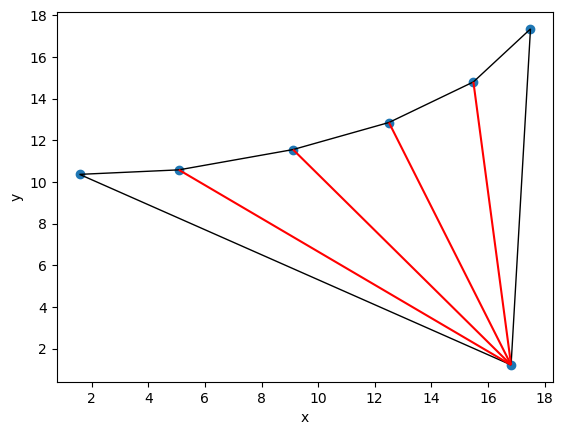

In [39]:
%matplotlib inline
triangulation1 = getTriangulationStructure(polygon1)
if triangulation1[1] is not None:
    printTriangulation(triangulation1)
    drawTriangulation(triangulation1)

Wielokąt testowy 2

Punkty:
	0: (2.218,1.544)
	1: (18.105,4.033)
	2: (7.702,5.440)
	3: (17.419,8.091)
	4: (7.984,9.498)
	5: (16.935,11.284)
	6: (8.508,13.232)
	7: (17.298,14.910)
	8: (6.048,18.048)
Pełna triangulacja (indeksy punktów):
	0 1
	1 2
	2 3
	3 4
	4 5
	5 6
	6 7
	7 8
	8 0
	8 6
	6 4
	8 4
	4 2
	8 2
	2 0


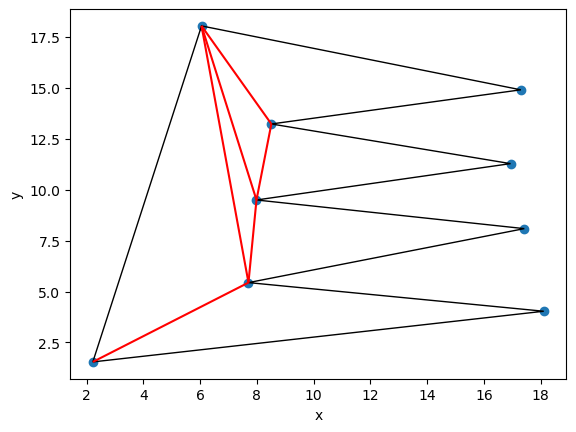

In [40]:
%matplotlib inline
triangulation2 = getTriangulationStructure(polygon2)
if triangulation2[1] is not None:
    printTriangulation(triangulation2)
    drawTriangulation(triangulation2)

Wielokąt testowy 3

Punkty:
	0: (7.944,3.546)
	1: (7.944,1.868)
	2: (9.476,1.814)
	3: (9.435,3.438)
	4: (13.226,3.546)
	5: (10.000,6.306)
	6: (13.508,7.388)
	7: (9.879,9.011)
	8: (13.871,10.959)
	9: (10.847,12.799)
	10: (14.395,14.747)
	11: (9.718,18.319)
	12: (4.194,15.126)
	13: (7.581,13.232)
	14: (5.081,11.663)
	15: (6.895,9.985)
	16: (4.234,6.739)
	17: (7.298,6.252)
	18: (4.315,4.574)
Pełna triangulacja (indeksy punktów):
	0 1
	1 2
	2 3
	3 4
	4 5
	5 6
	6 7
	7 8
	8 9
	9 10
	10 11
	11 12
	12 13
	13 14
	14 15
	15 16
	16 17
	17 18
	18 0
	12 10
	10 13
	13 9
	9 14
	14 8
	8 15
	15 7
	15 6
	6 16
	16 5
	5 17
	5 18
	18 4
	4 0
	0 3
	3 1


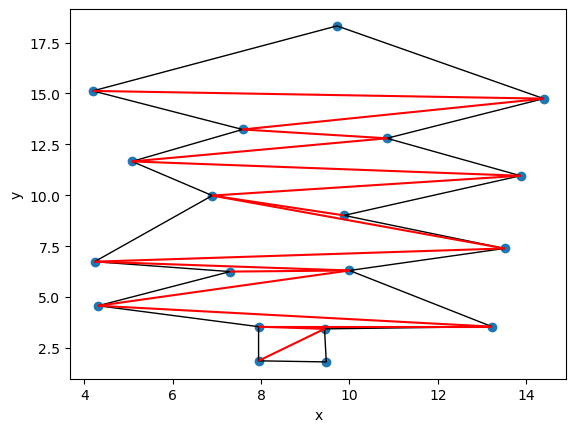

In [41]:
%matplotlib inline
triangulation3 = getTriangulationStructure(polygon3)
if triangulation3[1] is not None:
    printTriangulation(triangulation3)
    drawTriangulation(triangulation3)

Wielokąt testowy 4

In [42]:
%matplotlib inline
triangulation4 = getTriangulationStructure(polygon4)
if triangulation4[1] is not None:
    printTriangulation(triangulation4)
    drawTriangulation(triangulation4)

Wielokąt nie jest y-monotoniczny


<h2>Przedstawienie procesu działania algorytmu triangulacji</h2>

Przedstawimy proces działania algorytmu w postaci gifa. Użyte kolory oznaczają:
<ul>
    <li style="color:green">Wierzchołek na stosie</li>
    <li style="color:purple">Wierzchołek właśnie rozpatrywany</li>
    <li style="color:turquoise">Wierzchołek przetworzony</li>
    <li style="color:blue">Potencjalna przekątna</li>
    <li style="color:red">Ostateczna przekątna w triangulacji</li>
</ul>

Wielokąt wygenerowany

In [49]:
%matplotlib inline
_, canvasGenerated = triangulationDraw(generatedPolygon)
drawGif(canvasGenerated)

Wielokąt nie jest y-monotoniczny


Wielokąt testowy 1

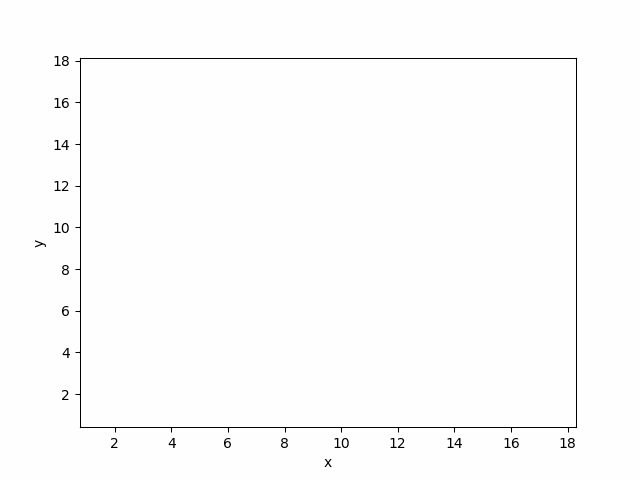

In [50]:
%matplotlib inline
_, canvas1 = triangulationDraw(polygon1)
drawGif(canvas1)

Wielokąt testowy 2

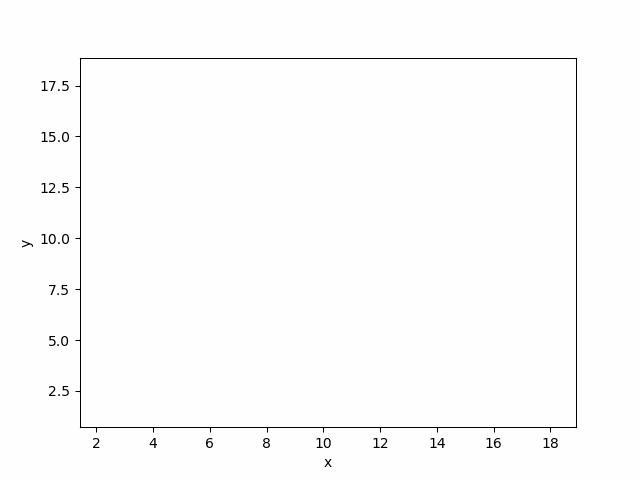

In [51]:
%matplotlib inline
_, canvas2 = triangulationDraw(polygon2)
drawGif(canvas2)

Wielokąt testowy 3

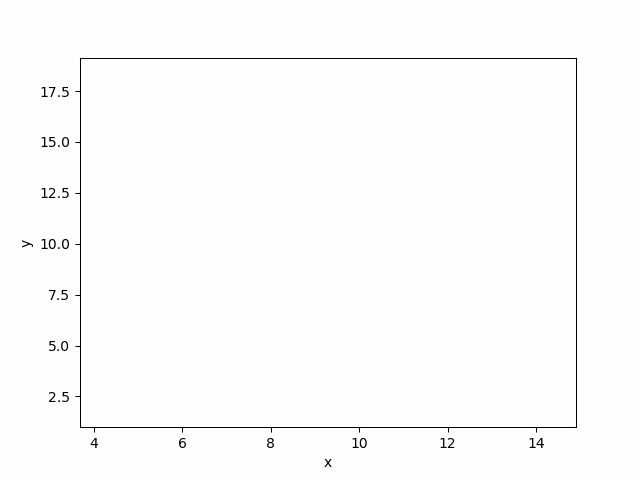

In [52]:
%matplotlib inline
_, canvas3 = triangulationDraw(polygon3)
drawGif(canvas3)

Wielokąt testowy 4

In [53]:
%matplotlib inline
_, canvas4 = triangulationDraw(polygon4)
drawGif(canvas4)

Wielokąt nie jest y-monotoniczny
